<a href="https://colab.research.google.com/github/sashivardhani/dstask1/blob/main/BHARAT_INTERN_DS_TASK1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler

In [ ]:
dataset=pd.read_csv('NFLX.csv')

In [ ]:
dataset_train=dataset.iloc[-1000:-100]
dataset_test=dataset.iloc[-100:]
print(dataset_train.columns.tolist())
print(dataset_test.columns.tolist())

['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']
['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume']


In [ ]:
trainset = dataset_train.iloc[:,1:2].values #Open
display(trainset[0:5])

array([[278.730011],
       [277.73999 ],
       [282.070007],
       [283.880005],
       [281.      ]])

In [ ]:
sc = MinMaxScaler(feature_range = (0,1))
training_scaled = sc.fit_transform(trainset)
print(training_scaled[0:5])
print(len(training_scaled))

[[0.1202792 ]
 [0.11762178]
 [0.12924443]
 [0.13410283]
 [0.12637231]]
900


In [ ]:
x_train = []
y_train = []


In [ ]:
for i in range(60,len(training_scaled)):
    x_train.append(training_scaled[i-60:i, 0])
    y_train.append(training_scaled[i,0])
x_train,y_train = np.array(x_train),np.array(y_train)
print(x_train.shape,y_train.shape)

(840, 60) (840,)


In [ ]:
x_train = np.reshape(x_train, (x_train.shape[0],x_train.shape[1],1))
print('(samples, time steps, features) =',x_train.shape)

(samples, time steps, features) = (840, 60, 1)


In [ ]:
regressor = Sequential()
regressor.add(LSTM(units = 50,return_sequences = True,input_shape = (x_train.shape[1],1)))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50,return_sequences = True))
regressor.add(Dropout(0.2))
regressor.add(LSTM(units = 50))
regressor.add(Dropout(0.2))
regressor.add(Dense(units = 1))


In [ ]:
regressor.compile(optimizer = 'adam',loss = 'mean_squared_error')

regressor.fit(x_train,y_train,epochs =100, batch_size = 32)

Epoch 1/100
27/27 [==============================] - 9s 118ms/step - loss: 0.0451
Epoch 2/100
27/27 [==============================] - 2s 81ms/step - loss: 0.0108
Epoch 3/100
27/27 [==============================] - 2s 82ms/step - loss: 0.0096
Epoch 4/100
27/27 [==============================] - 2s 81ms/step - loss: 0.0080
Epoch 5/100
27/27 [==============================] - 3s 94ms/step - loss: 0.0082
Epoch 6/100
27/27 [==============================] - 3s 116ms/step - loss: 0.0076
Epoch 7/100
27/27 [==============================] - 2s 83ms/step - loss: 0.0077
Epoch 8/100
27/27 [==============================] - 2s 81ms/step - loss: 0.0076
Epoch 9/100
27/27 [==============================] - 2s 81ms/step - loss: 0.0081
Epoch 10/100
27/27 [==============================] - 2s 82ms/step - loss: 0.0070
Epoch 11/100
27/27 [==============================] - 3s 101ms/step - loss: 0.0062
Epoch 12/100
27/27 [==============================] - 2s 81ms/step - loss: 0.0065
Epoch 13/100
27/27 [==

In [ ]:
real_stock_price = dataset_test.iloc[:,1:2].values
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis = 0)


In [ ]:
print(len(dataset_total),len(dataset_test))
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
print(inputs.shape)

1000 100
(160,)


In [ ]:
inputs = inputs.reshape(-1,1)
print(inputs.shape)
#sc = MinMaxScaler(feature_range = (0,1))
inputs = sc.transform(inputs)
print(inputs.shape)

(160, 1)
(160, 1)


In [ ]:
x_test = []
for i in range(60,len(inputs)):
    x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
print(x_test.shape)

x_test = np.reshape(x_test, (x_test.shape[0],x_test.shape[1],1))
print(x_test.shape)

(100, 60)
(100, 60, 1)


In [ ]:
predicted_price = regressor.predict(x_test)

4/4 [==============================] - 1s 17ms/step


In [ ]:
predicted_price = sc.inverse_transform(predicted_price)
print(predicted_price.shape)

(100, 1)


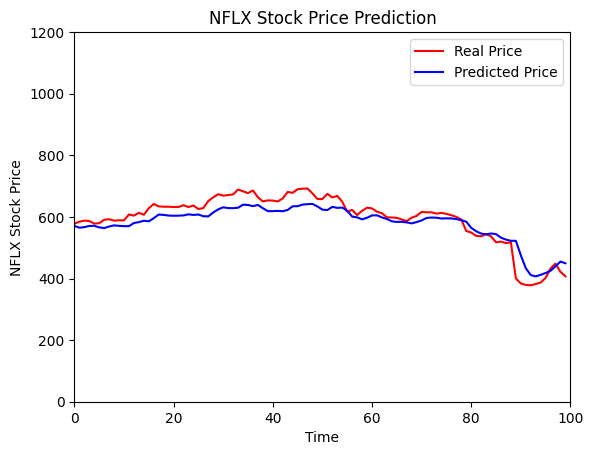

In [ ]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(predicted_price, color = 'blue', label = 'Predicted Price')
plt.title('NFLX Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NFLX Stock Price')
plt.xlim(0,100)
plt.ylim(0,1200)
plt.legend()
plt.show()

In [ ]:
inputs = np.array(dataset_train['Open'][-60:])
new_predicted_price=[]
for i in range(100):
    x = np.reshape(inputs, (1,60,1))
    pred = regressor.predict(x)
    inputs = np.append(inputs, pred)
    inputs = inputs[1:]
    new_predicted_price+=[pred.reshape(-1)]

1/1 [==============================] - 0s 21ms/step


In [ ]:
new_predicted_price = sc.inverse_transform(np.array(new_predicted_price))
print(new_predicted_price.shape)

(100, 1)


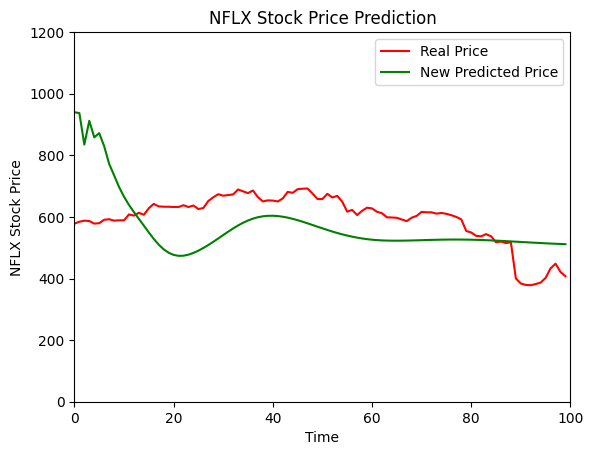

In [ ]:
plt.plot(real_stock_price,color = 'red', label = 'Real Price')
plt.plot(new_predicted_price, color = 'green', label = 'New Predicted Price')
plt.title('NFLX Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('NFLX Stock Price')
plt.xlim(0,100)
plt.ylim(0,1200)
plt.legend()
plt.show()